![](https://i.postimg.cc/zXjH0wvN/9ude564c.png)




<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: #682F2F;">$$Customer Segmentation(Split)$$</span>
</div>

### In this project, I'll make the data more appealing by categorizing customers into segments based on their shared characteristics. This will help us tailor products and services to meet each segment's distinct needs and behaviors, enabling the business to better address a variety of customer concerns.

In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
df = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep='\t')
print(f" Data Shape:- {df.shape}")
df.sample(5)

 Data Shape:- (2240, 29)


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
324   2607        1953  Graduation         Single  40464.0        0         1   
96    7247        1960  Graduation          Widow  47916.0        0         1   
2104  5802        1972       Basic        Married  14188.0        0         0   
1259  2147        1969  Graduation       Together  76653.0        0         0   
1061  3759        1958  Graduation       Together  65196.0        0         2   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
324   11-01-2013       78       424  ...                  8             0   
96    22-11-2012       72       505  ...                  6             0   
2104  28-02-2013       40         2  ...                  6             0   
1259  16-08-2013       91       736  ...                  2             0   
1061  25-07-2013       34       743  ...                  5             1   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
324              0             0             0             0         0   
96               1             0             0             0         0   
2104             0             0             0             0         0   
1259             0             1             1             0         0   
1061             0             0             0             0         0   

      Z_CostContact  Z_Revenue  Response  
324               3         11         0  
96                3         11         0  
2104              3         11         0  
1259              3         11         0  
1061              3         11         0  

[5 rows x 29 columns]

<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: midnightblue;">$$Data Cleaning$$</span>
</div>

### ***Now it's time to clean the data and do some feature engineering***

### **In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.**

In [3]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### From the above output, we can make the following observations:

#### 1. There are missing values in the "income" column.
#### 2. The **"Dt_Customer"** column, which indicates the date a customer joined the database, is not in DateTime format.
#### 3. There are categorical features in our dataset, as some columns have a data type of "object." These will need to be encoded into numeric formats later.

### To address the missing values, I'll start by removing the rows with missing income values.

In [4]:
df = df.dropna()
print(f"Total number of data-point after removing some missing value in rows:-{len(df)}")

Total number of data-point after removing some missing value in rows:-2216


#### In the next step, I will create a feature based on **"Dt_Customer"** to represent the number of days each customer has been registered in the firm's database. To keep it simple, I will calculate this value relative to the most recent customer registration date in the records.

### **To obtain these values, I need to identify the newest and oldest recorded dates in the dataset.**

In [5]:
df['Dt_Customer'].head()

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [6]:
df['Dt_Customer'] = pd.to_datetime(df["Dt_Customer"],format='%d-%m-%Y')
dates = []
for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
print(f"The newest Customer enrollment date in the records :- {max(dates)}")
print(f"The oldest Customer enrollment date in the records :- {min(dates)}")  

The newest Customer enrollment date in the records :- 2014-06-29
The oldest Customer enrollment date in the records :- 2012-07-30


**Introducing a new and engaging feature: "[Customer_Dur]" This feature calculates the number of days each customer has been a valued patron of our store, relative to our most recent record.**

In [7]:
# Creating a feature "Customer_Dur" customer duration days spending on store
days = []
D1 = max(dates) # newest customer enrollment date record
for i in dates:
    delt = D1-i
    days.append(delt)
df['Customer_Dur'] = days
df['Customer_Dur'] = pd.to_numeric(df['Customer_Dur'], errors='coerce')
    

**Now we will be exploring the unique values in categorical features to get a clear idea of the data** 

In [8]:
print(f"Total categorical feature in Marital_Status:- {df['Marital_Status'].value_counts()}\n")
print(f"Total categorical feature in Education:- {df['Education'].value_counts()}\n")

Total categorical feature in Marital_Status:- Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Total categorical feature in Education:- Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64



## **In the upcoming steps, we'll embark on an exciting journey of feature engineering, breathing new life into our dataset:**

### 1. **Age Extraction**: We'll unveil the age of each customer by deciphering their birth year from the "Year_Birth."

### 2. **Spending Power**: Introducing "Spent," a dynamic feature showcasing the total expenditure across various categories over the past two years.

### 3. **Household Living Arrangement**: We'll craft "Living_With" from "Marital_Status," revealing the living arrangements of our valued couples.

### 4. **Family Dynamics**: "Children" will emerge, quantifying the number of children in a household, encompassing both the young ones and teenagers.

### 5. **Family Unity**: "Family_Size" will take shape, providing insights into the size and structure of each household.

### 6. **Parental Status**: "Is_Parent" will be born, simplifying the journey of parenthood for our customers.

### 7. **Educational Evolution**: "Education" will undergo a transformation, restructured into three distinct categories for clarity.

### 8. **Farewell to Redundancy**: We'll bid adieu to redundant features, streamlining our dataset for a sleek and insightful analysis.

In [9]:
# Feature Engineering 
                     # Checking recent year in Customer Age
df['Age'] = 2023-df['Year_Birth']

# Total Spending on respactive items
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']
# geting living situation by Marital_Status "Alone"
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner','Together':'Partner',
                                                 'Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})
# Feature indicating total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Feature for total members in household
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']

# Feature pertaining parenthold
df['Is_Parent'] = np.where(df.Children > 0,1,0)

# Separating education level in three group
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate',
                                          'Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})
# For Clearness
df = df.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat',
                       'MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})
# Droping Some of the unnecessary features
drop_col = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(drop_col, axis=1)

***Now checking our new features***

In [10]:
#Data Description
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_Dur  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  3.054423e+16   
std        0.244950      0.115588     0.096907     0.357417  1.749036e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  1.555200e+16   
50%        0.000000      0.000000     0.000000     0.000000  3.071520e+16   
75%        0.000000      0.000000     0.000000     0.000000  4.570560e+16   
max        1.000000      1.000000     1.000000     1.000000  6.039360e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     54.179603   536.081227     0.947202     2.592509     0.714350  
std      11.985554   553.429700     0.749062     0.905722     0.451825  
min      27.000000     3.000000     0.000000     1.000000     0.000000  
25%      46.000000    50.000000     0.000000     2.000000     0.000000  
50%      53.000000   329.000000     1.000000     3.000000     1.000000  
75%      64.000000   924.000000     1.000000     3.000000     1.000000  
max     130.000000  2343.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

In [11]:
#Checking Maximum Age Outlier 130 
df[df['Age'] == 130]

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
239  Undergraduate  60182.0        0         1       23      8       0     5   

     Fish  Sweets  ...  AcceptedCmp2  Complain  Response      Customer_Dur  \
239     7       0  ...             0         0         0  3715200000000000   

     Age  Spent  Living_With  Children  Family_Size  Is_Parent  
239  130     20        Alone         1            2          1  

[1 rows x 30 columns]

In [12]:
#Checking Maximum Income Outlier 666666
df[df['Income'] == 666666]

Education    Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
2233  Graduate  666666.0        1         0       23      9      14    18   

      Fish  Sweets  ...  AcceptedCmp2  Complain  Response       Customer_Dur  \
2233     8       1  ...             0         0         0  33868800000000000   

      Age  Spent  Living_With  Children  Family_Size  Is_Parent  
2233   46     49      Partner         1            3          1  

[1 rows x 30 columns]

#### ***The statistics reveal certain inconsistencies in the mean income and age, as well as the maximum income and age values.***

#### ***It's worth noting that the maximum age appears to be "130 years", which suggests that the age calculation might be based on the assumption that the data is up to the year 2023. The dataset might not have been updated with recent information.***

#### ***To gain a deeper understanding of the data, I'll proceed to visualize selected features through plots and charts.***

Selected Features Plot : A Data Subset
***************************************


<Figure size 800x550 with 0 Axes>

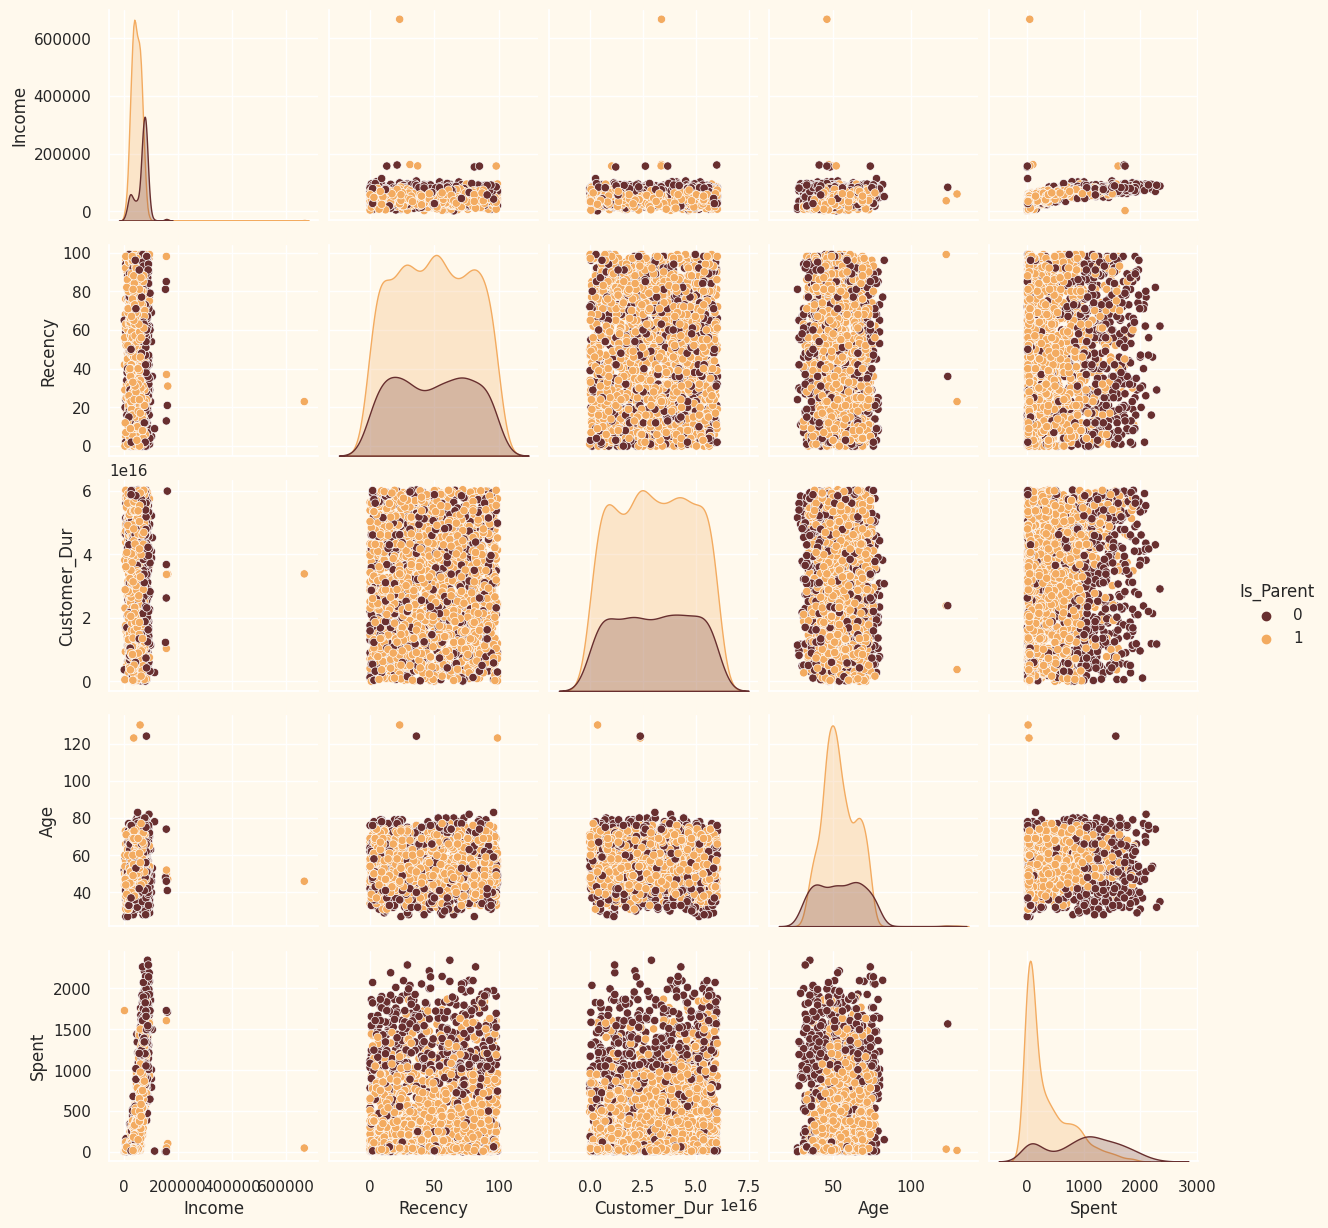

In [13]:
# ploting some selected features
                               # Setting some color prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallete = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
# Ploting selected feature
ploting = [ "Income", "Recency", "Customer_Dur", "Age", "Spent", "Is_Parent"]
print('Selected Features Plot : A Data Subset')
print('***************************************')
plt.figure()
sns.pairplot(df[ploting],hue='Is_Parent',palette= (["#682F2F","#F3AB60"]))
plt.show()

#### *It's pretty clear that we have a few unusual values in the 'Income' and 'Age' data. To keep our analysis on the right track, I'll be removing these unusual values from the dataset. This way, we can focus on the typical patterns and make better sense of the data.*

In [14]:
# Droping the outliers by setting a cap on Age and Income columns
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print(f"Total Number of Data After Removing the Outliers are:- {len(df)}")

Total Number of Data After Removing the Outliers are:- 2212


#### *Now, let's explore the relationships between our features by examining their correlations. We'll exclude the categorical attributes for now and focus on the numerical aspects.*

<Axes: >

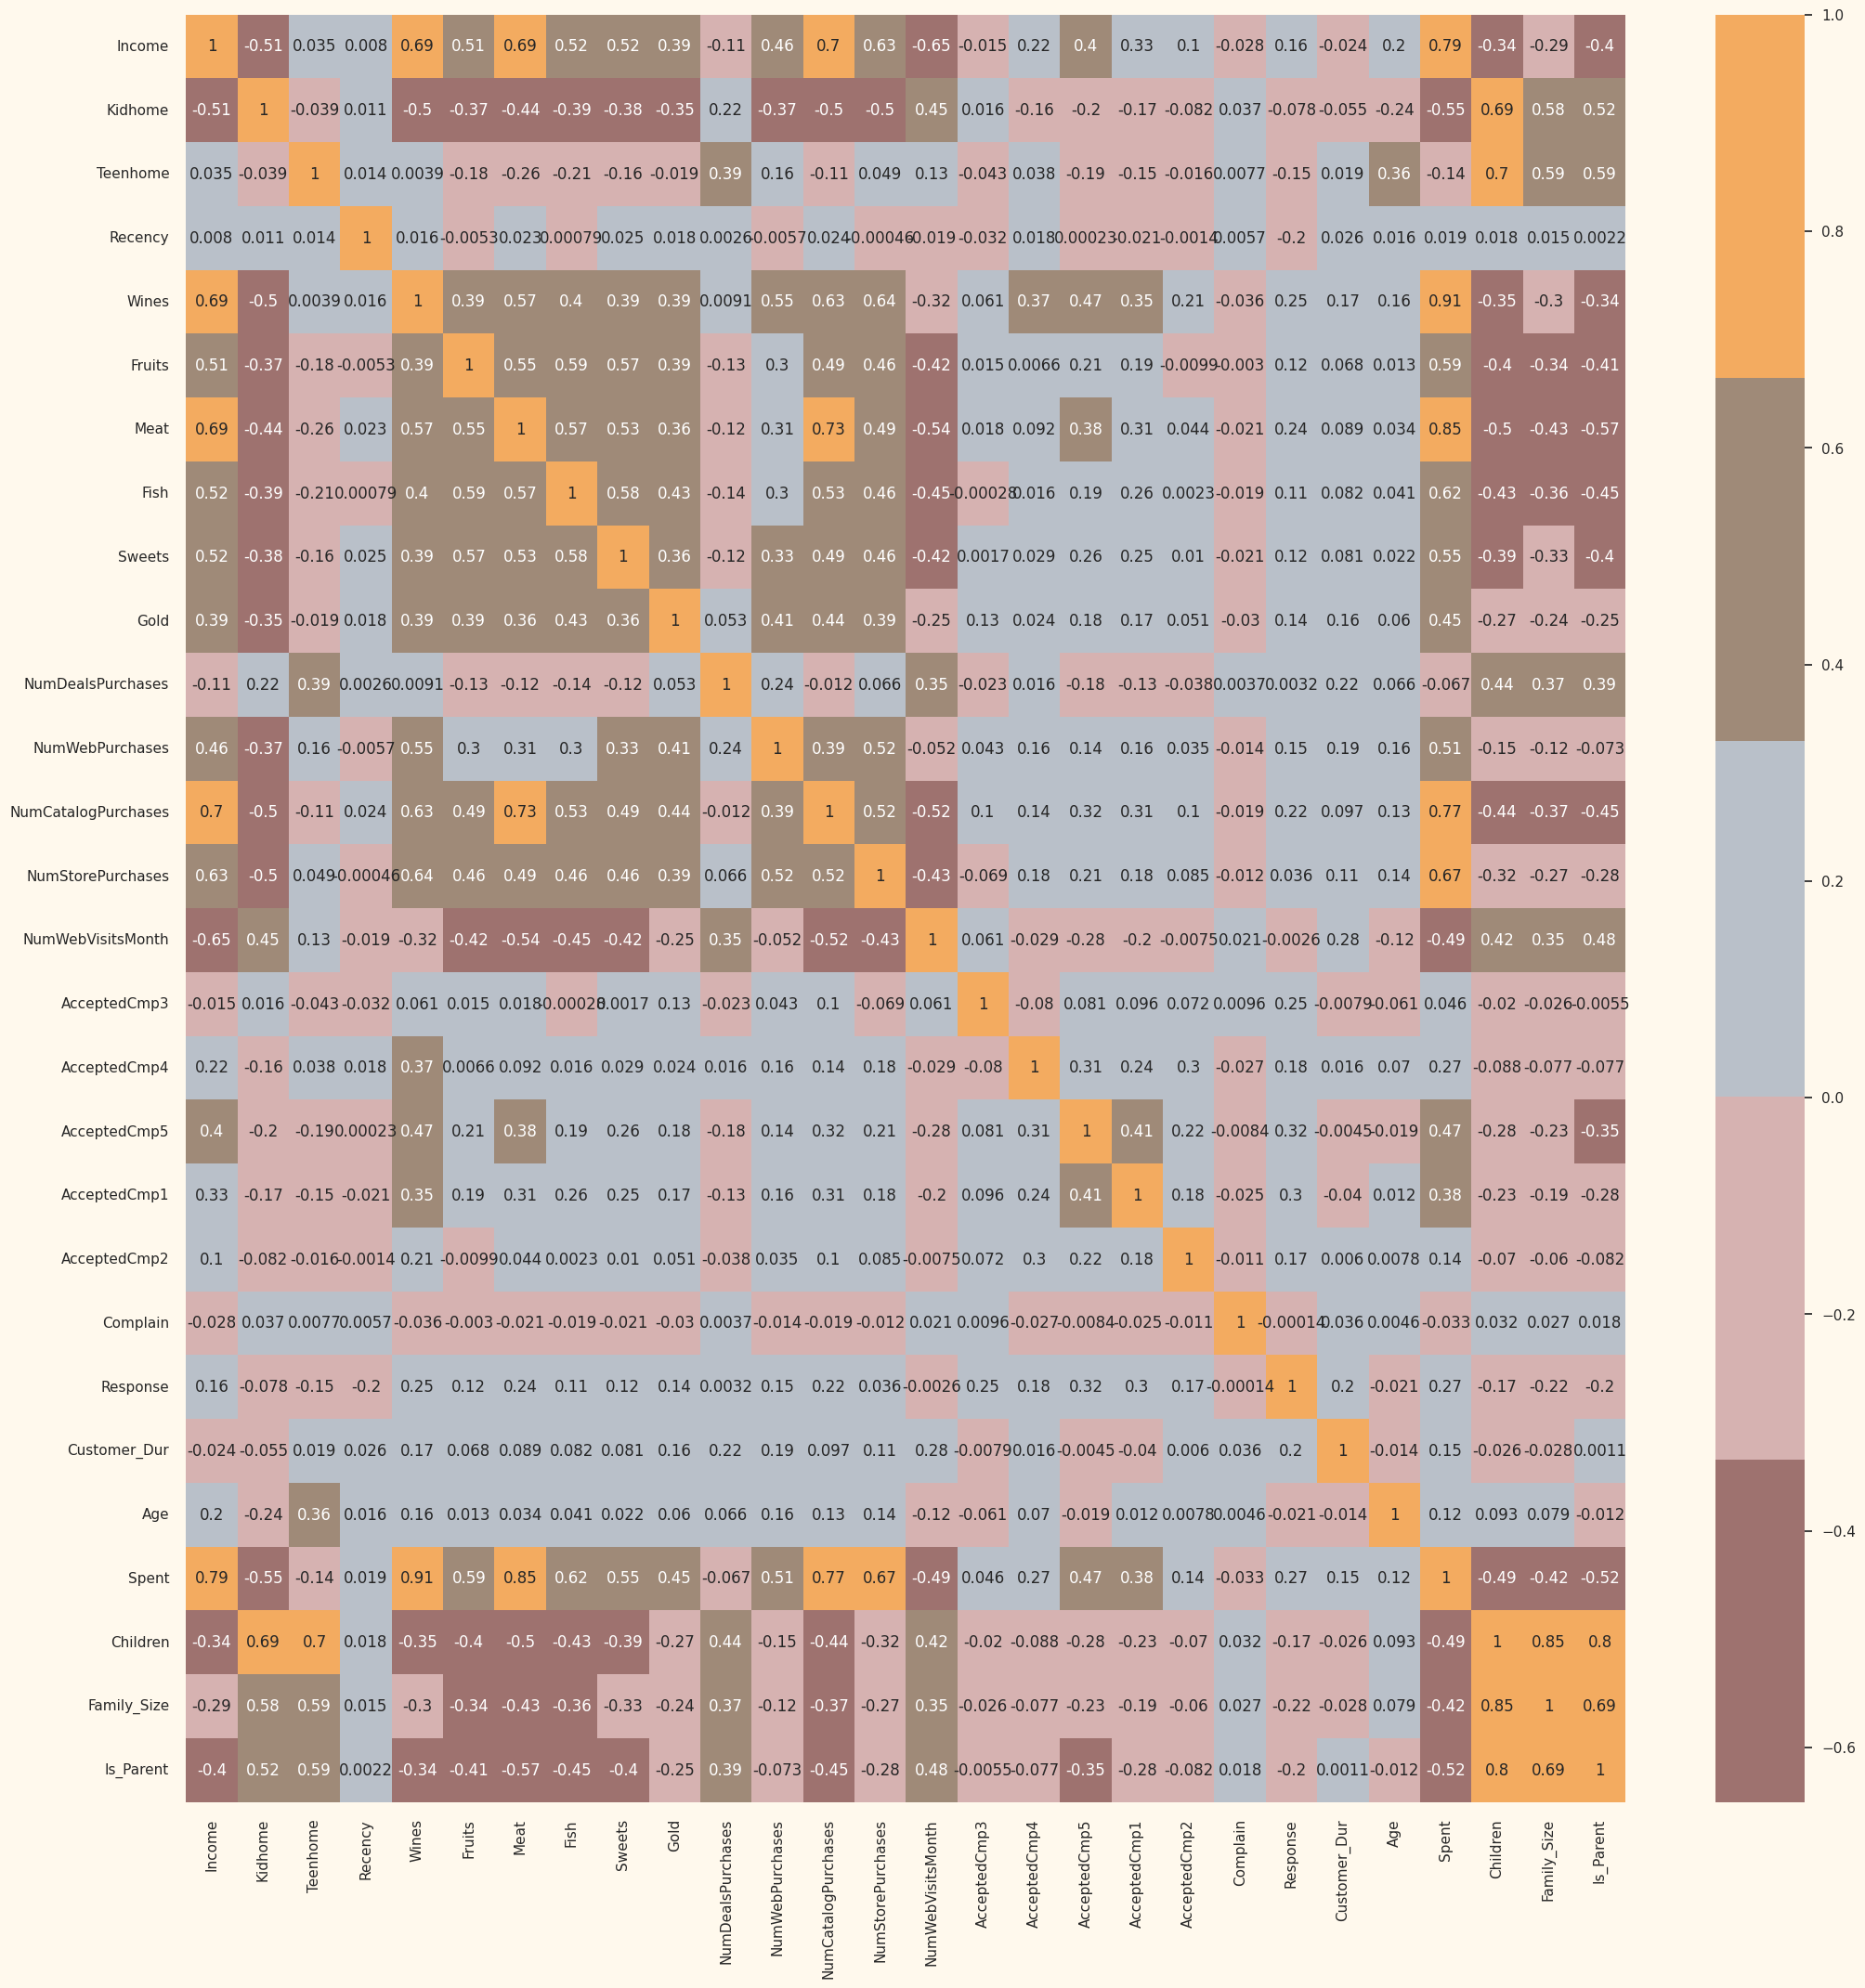

In [15]:
# Create a subset of the DataFrame with only numerical features
numerical_data = df.select_dtypes(include=['int64', 'float64'])
# Correlation Matrix
corrmat= numerical_data.corr()
plt.figure(figsize=(25,25))  
sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

#### **"Okay, so our data is nice and tidy, and we've got our cool new features all set. Now, let's prep the data for what comes next!** 🚀🛠️"

<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: purple;">$$Data  Preprocessing$$</span>
</div>


### **In this section, I'll get the data ready for our clustering operations.** 👩‍🔬📊

### **For data preprocessing, we're taking the following steps:**

#### 1. **Label Encoding**: We're translating our categorical features into numbers so that our algorithms can work their magic.

#### 2. **Scaling**: We're using the standard scaler to put all our features on the same playing field, making it easier for our algorithms to do their thing.

#### 3. **Dimensionality Reduction**: We're creating a smaller, more manageable subset of our data, simplifying the complexity for smoother analysis.

In [16]:
# Get list of categorical variable
L = (df.dtypes == 'object')
obj_col = list(L[L].index)
print(f'Categorical Variable in the DataSet:-{obj_col}')

Categorical Variable in the DataSet:-['Education', 'Living_With']


In [17]:
# Label Encoding the object dtypes
LE = LabelEncoder()
for i in obj_col:
    df[i] = df[[i]].apply(LE.fit_transform)
print("Now our Feature is Numerical")

Now our Feature is Numerical


In [18]:
df.columns

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Wines',
       'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Customer_Dur',
       'Age', 'Spent', 'Living_With', 'Children', 'Family_Size', 'Is_Parent'],
      dtype='object')

In [19]:
# Creating a copy of data
df1 = df.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
del_col = ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']
df1 = df1.drop(del_col,axis=1)
# Scaling
scaler = StandardScaler()
scaler.fit(df1)
scaled_df = pd.DataFrame(scaler.fit_transform(df1),columns= df1.columns)
print(f"Now Our Feature is Scaled")

Now Our Feature is Scaled


In [20]:
#Scaled data to be used for reducing the dimensionality
print(f"DataFrame to be used for further Modeling")
scaled_df.head()

DataFrame to be used for further Modeling


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_Dur       Age     Spent  Living_With  Children  \
0           0.692181      1.527721  1.018352  1.635802    -1.349603 -1.264598   
1          -0.132545     -1.189011  1.274785 -0.933518    -1.349603  1.404572   
2          -0.544908     -0.206048  0.334530  0.319500     0.740959 -1.264598   
3           0.279818     -1.060584 -1.289547 -0.888315     0.740959  0.069987   
4          -0.132545     -0.951915 -1.033114 -0.282599     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: darkorange;">$$Dimensionality Reduction 🌌$$</span>
</div>

#### "In this scenario, we've got a bunch of factors that decide the final classification. These factors are like characteristics or traits. The more of these traits we have, the trickier it gets to handle. Plus, some of these traits are kind of related and do the same job. That's why we're going to do something called 'dimensionality reduction' on the important traits before we use them in our classification. 🌟

#### **Dimensionality reduction is like tidying up and getting rid of the extra stuff. It helps us focus on the key traits that matter the most.** 🎯📉"

## Principal Component Analysis (PCA) is a clever trick that simplifies complex datasets, making them easier to understand without losing too much info. 🪄

## **Here's what's cooking in this section:**

### 1. We'll work some PCA magic to slim down our data.
### 2. We'll also put on a show with a cool plot to showcase the sleeker dataset.

## *Buckle up, because we're reducing dimensions to just 3 for this project.* 🚀📊

In [21]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=(['col1','col2','col3']))
pca_df.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -3.854662e-17  2.872596 -5.976776 -2.535611 -0.772512  2.380792   
col2  2212.0 -7.066881e-17  1.708725 -4.191464 -1.323328 -0.163242  1.227944   
col3  2212.0  7.147186e-17  1.231137 -3.642894 -0.858649 -0.051767  0.859549   

           max  
col1  7.420837  
col2  6.170891  
col3  6.742179

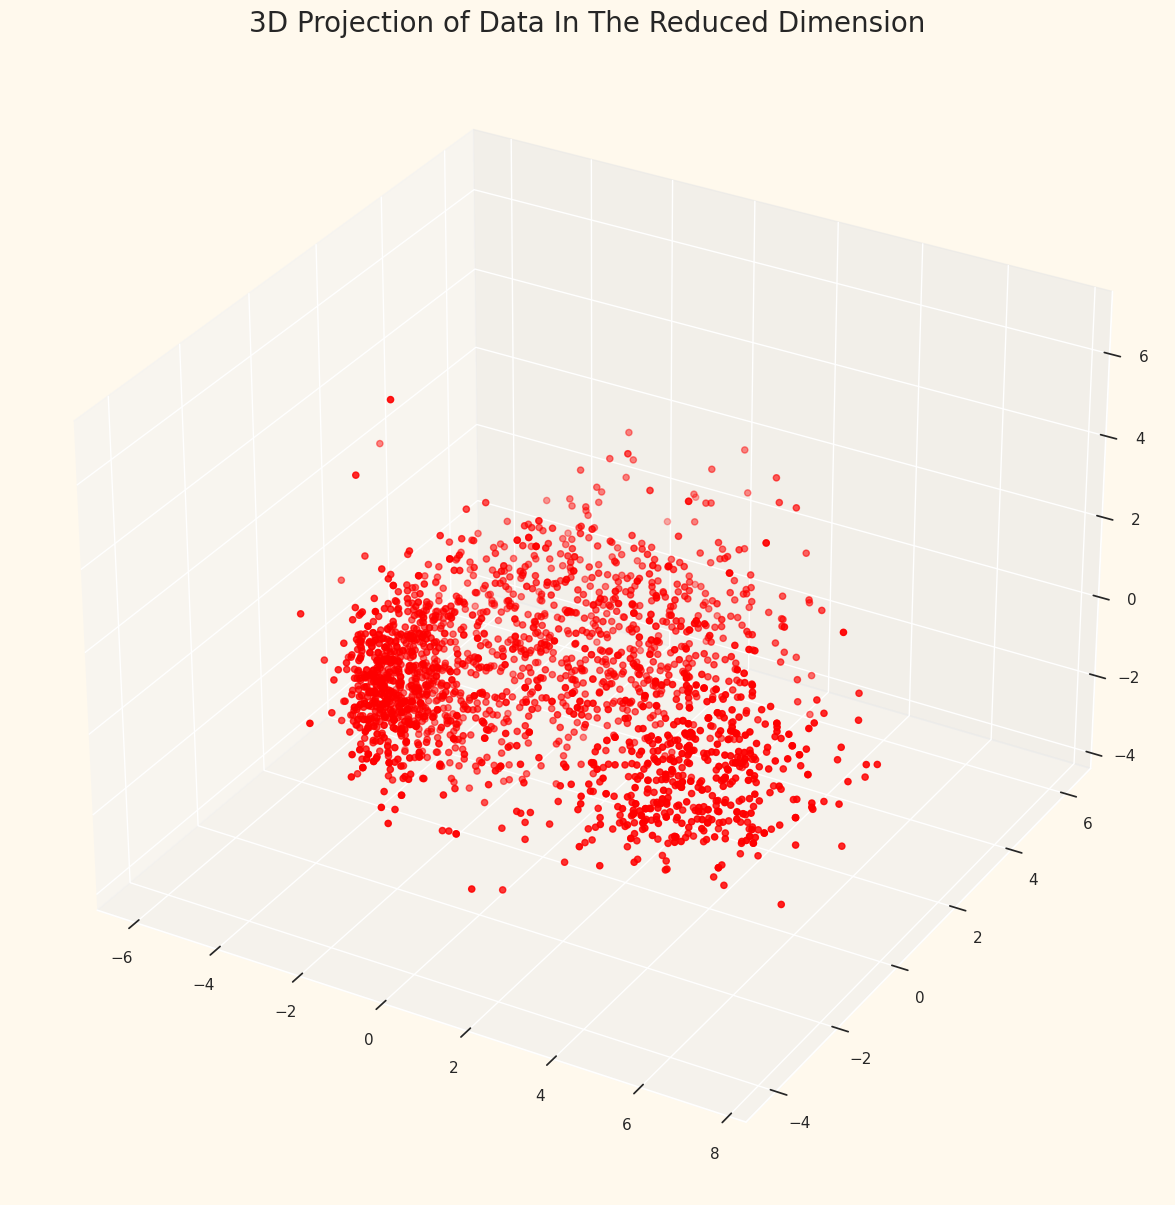

In [22]:
#A 3D Projection Of Data In The Reduced Dimension
x = pca_df['col1']
y = pca_df['col2']
z = pca_df['col3']
# plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z, c='red',marker='o')
ax.set_title('3D Projection of Data In The Reduced Dimension',fontsize=20)
plt.show()

<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: black;">$$CLUSTERING 🌟$$</span>
</div>

### "Now that we've trimmed our data to just three key aspects, it's time for clustering using Agglomerative Clustering. 🧩

### Agglomerative clustering is like building a family tree with data. We keep merging and grouping examples until we have the right number of clusters. It's a bit like nature's organization chart for our data! 🌳👥"


### The journey through clustering has a few key milestones:

#### 1. **Elbow Method**: We'll pinpoint the ideal number of clusters.
#### 2. **Agglomerative Clustering**: The heart of our clustering journey.
#### 3. **Scatter Plot Revelations**: We'll unveil the cluster patterns using scatter plots. 📊🔍



Elbow method to determine the number of clusters to be formed:-


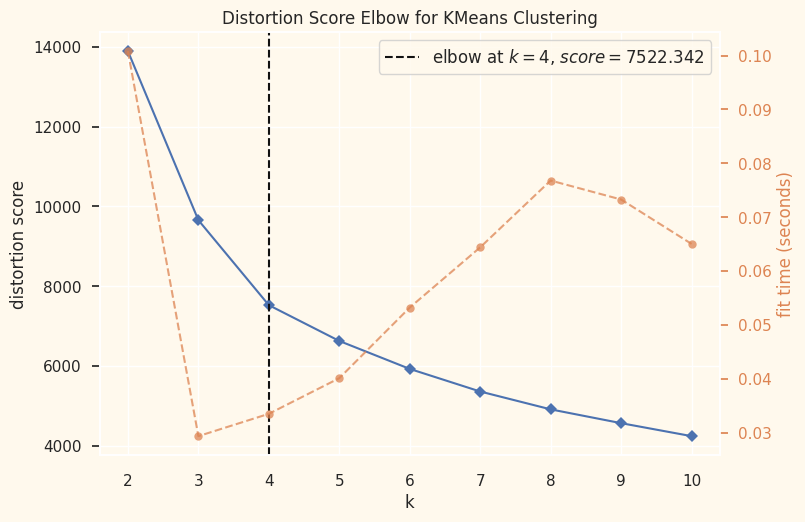

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
# quick examination of elbow method to find numbers of cluster to make
print(f"Elbow method to determine the number of clusters to be formed:-")
elbow_d = KElbowVisualizer(KMeans(),k=10)
elbow_d.fit(pca_df)
elbow_d.show()

### **The previous cell suggests that four clusters are the ideal choice for our data. Now, we're diving in to train the Agglomerative Clustering Model to create those clusters.** 🕵️‍♂️🔢

In [24]:
# Initiating the Agglomerative Clustering model
ac = AgglomerativeClustering(n_clusters=4)
# Fiting model and predicting the clusters
yhat_ac = ac.fit_predict(pca_df)
pca_df['Cluster'] = yhat_ac
#Adding the cluster feature to the orginal DataFrame
df['Cluster'] = yhat_ac

***To get a closer look at the clusters, we'll explore their 3-D distribution. It's like unraveling the story of our data in three dimensions.*** 📦📊🌐

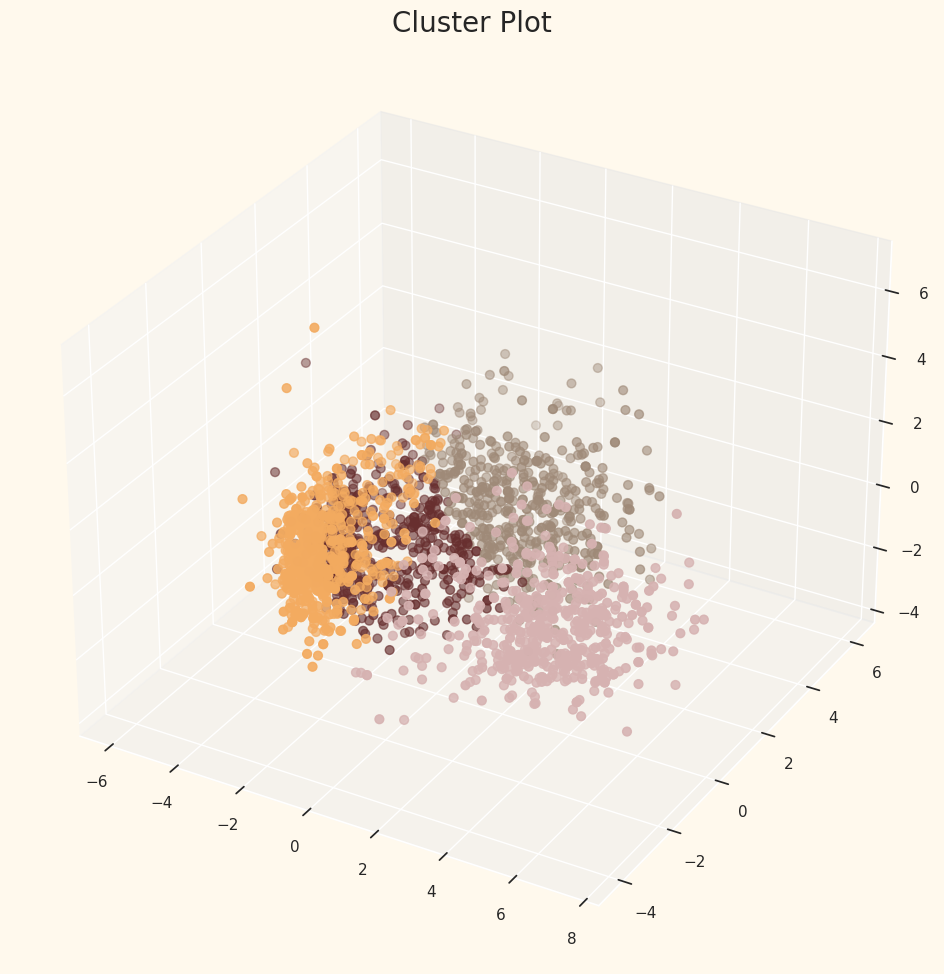

In [25]:
# plotting the cluster
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111, projection='3d',label='bla')
ax.scatter(x,y,z, s=40, c=pca_df['Cluster'],marker='o',cmap=cmap)
ax.set_title('Cluster Plot',fontsize=20)
plt.show()

<div style="border: 10px solid green; padding: 5px;">
    <span style="font-size: 35px; color: brown;">$$Let's Evaluate Our Models!📊$$</span>
</div>

#### As this is an unsupervised clustering task, we don't have a predefined feature for model evaluation. In this section, our aim is to delve into the clusters we've created and uncover the underlying patterns. We're on a quest to understand the nature of these clusters and the stories they tell. 🧩📚🔍

#### To achieve that, we'll shine a light on our data using exploratory data analysis, focusing on our clusters. It's all about uncovering insights and drawing meaningful conclusions. 🧐📊🔍

### First, let's check how our data is divided into clusters. 📊🧩

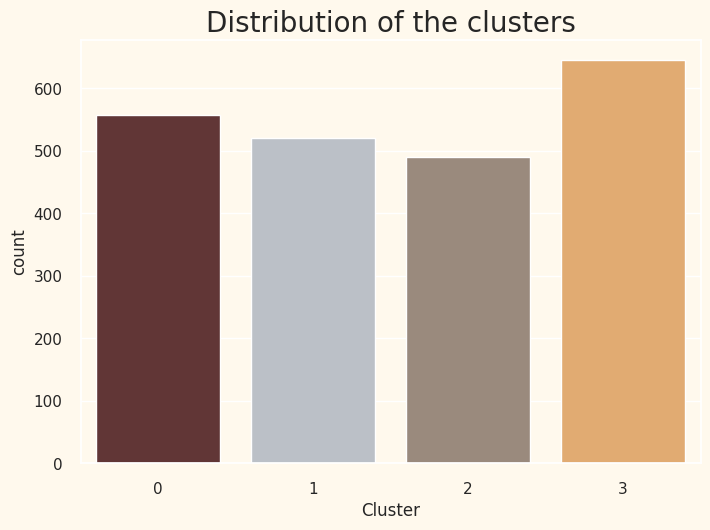

The clusters appear to be evenly spread out. 🌟📊🌐


In [26]:
# count plot of our cluster
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
plo = sns.countplot(x=df['Cluster'], palette = pal)
plo.set_title('Distribution of the clusters',fontsize=20)
plt.show()
print('The clusters appear to be evenly spread out. 🌟📊🌐')

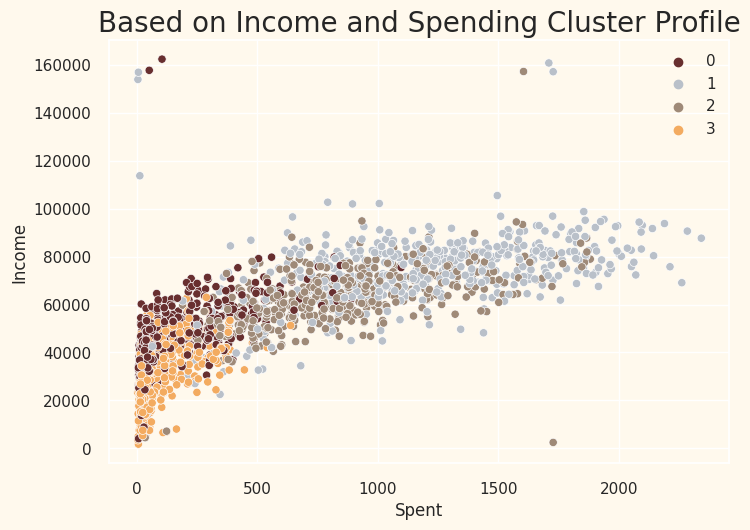

In [27]:
pl = sns.scatterplot(data = df, x= df['Spent'],y=df['Income'], hue=df['Cluster'], palette = pal)
pl.set_title('Based on Income and Spending Cluster Profile',fontsize=20)
plt.legend()
plt.show()

#### The Income vs. Spending plot reveals intriguing cluster patterns:

-   Group 0: High spending with average income.
-   Group 1: High spending with high income.
-   Group 2: Low spending with low income.
-   Group 3: High spending with low income.

#### Now, let's delve deeper and explore the distribution of clusters across specific products like Wines, Fruits, Meat, Fish, Sweets, and Gold. 📈🛒📊

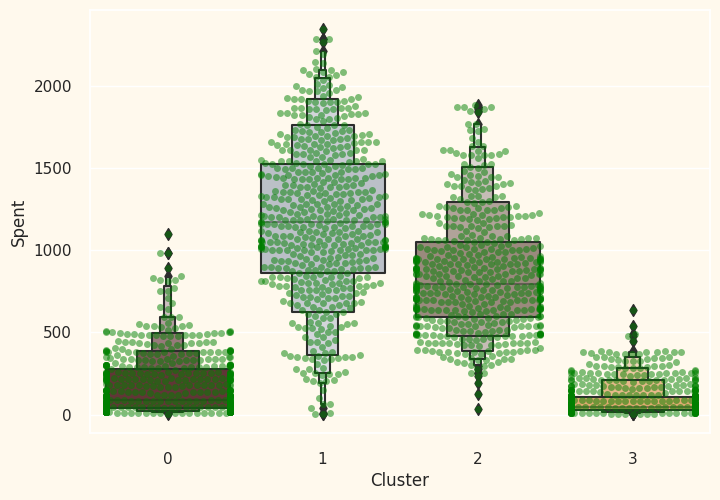

In [28]:
plt.figure()
plot = sns.swarmplot(x=df['Cluster'],y=df['Spent'],color='green',alpha=0.5)
plot = sns.boxenplot(x=df['Cluster'],y=df['Spent'], palette=pal)
plt.show()

#### *The plot above paints a clear picture: Cluster 1 is our largest group of customers, closely trailed by Cluster 0. This insight is gold for tailoring our marketing strategies. Now, let's see what each cluster is splurging on to target them effectively.* 🎯💰📈

### **Next on our agenda is a journey into the past to see how our previous campaigns fared.** 📅🔍📈

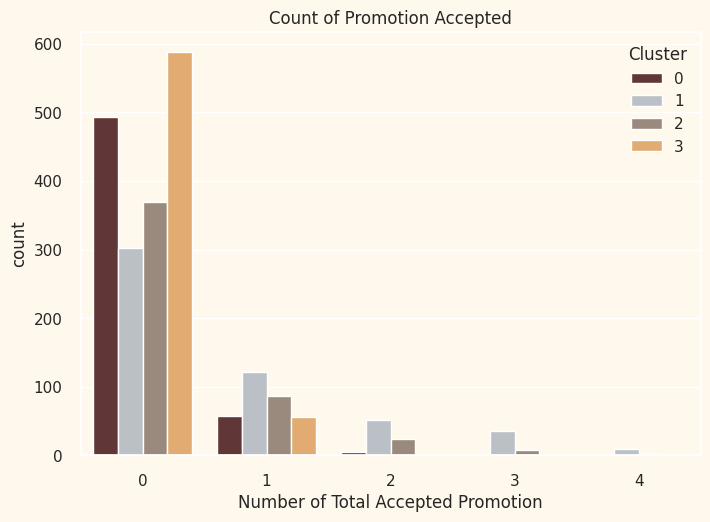

In [29]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
plot = sns.countplot(x=df['Total_Promos'],hue=df['Cluster'],palette = pal)
plot.set_title('Count of Promotion Accepted')
plot.set_xlabel('Number of Total Accepted Promotion')
plt.show()

#### **It seems our past campaigns haven't sparked an overwhelming response. We've had very few participants overall, and interestingly, no one has taken part in all five campaigns. This suggests that more targeted and meticulously planned campaigns might be the key to boosting sales.** 🚀📉📈

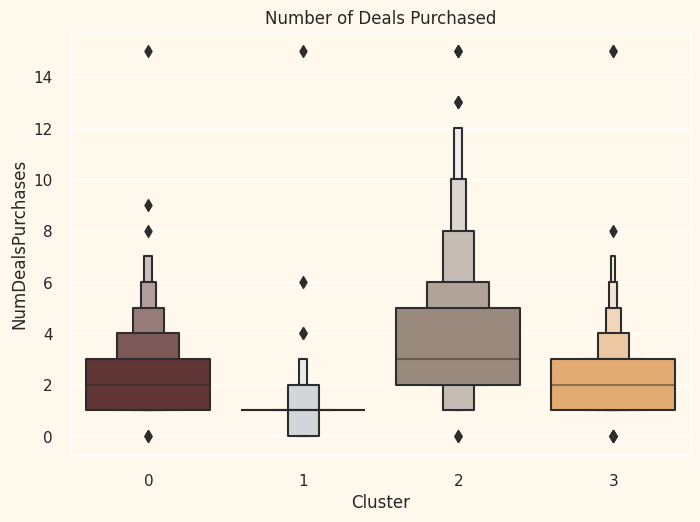

In [30]:
# ploting the number of deals purchased
plt.figure()
plot = sns.boxenplot(y=df['NumDealsPurchases'],x=df['Cluster'],palette=pal)
plot.set_title('Number of Deals Purchased')
plt.show()

### ***In contrast to the campaigns, our offered deals have performed well, particularly with Cluster 0 and Cluster 3. Surprisingly, our star customers in Cluster 1 don't seem as interested in these deals, while Cluster 2 appears to be overwhelmingly positive about them.*** 🌟💼📊

<div style="border: 12px solid green; padding: 5px;">
    <span style="font-size: 35px; color: blue;">$$Profiling📊$$</span>
</div>

### *Now that we've created and examined our clusters and their buying patterns, let's meet the individuals in these clusters. We'll profile the clusters and determine who our star customers are and who might benefit from more attention from the retail store's marketing team.* 🌟🧑‍🤝‍🧑🔍

### **To make this decision, I'll plot certain features that reveal the personal traits of our customers within their respective clusters. Based on these findings, I'll draw conclusions and make informed decisions.** 📊🧐📈

<Figure size 800x550 with 0 Axes>

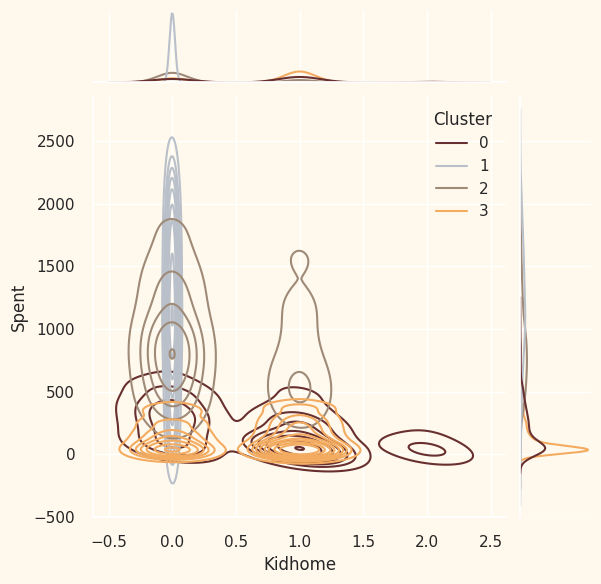

<Figure size 800x550 with 0 Axes>

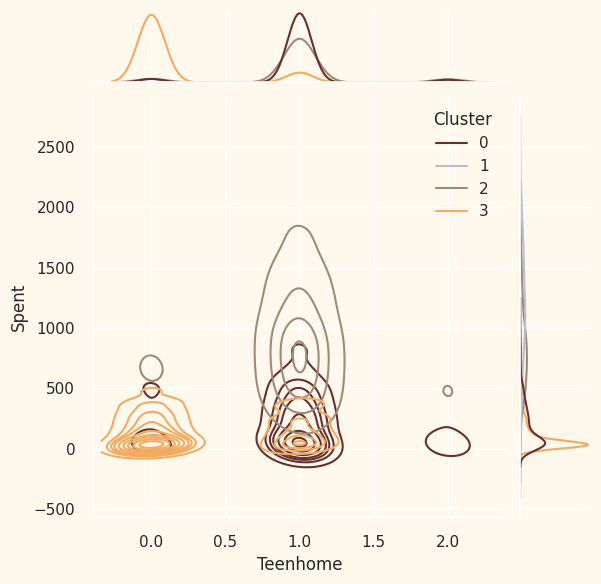

<Figure size 800x550 with 0 Axes>

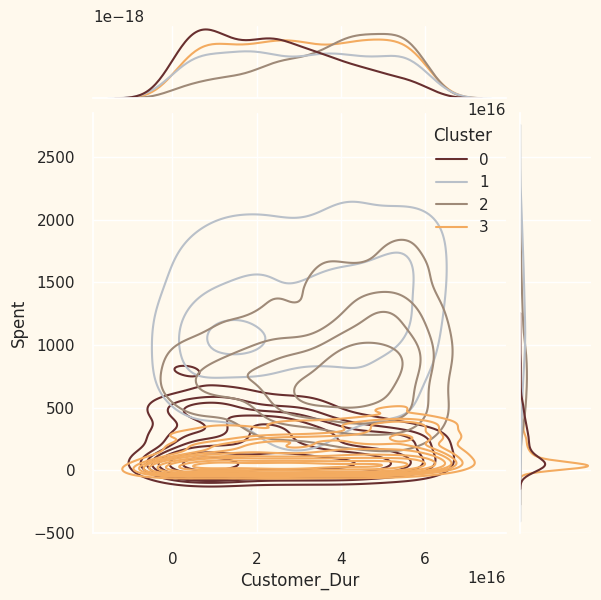

<Figure size 800x550 with 0 Axes>

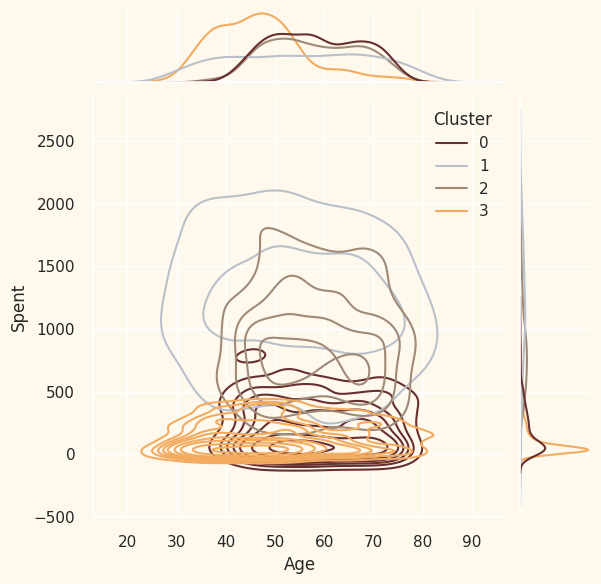

<Figure size 800x550 with 0 Axes>

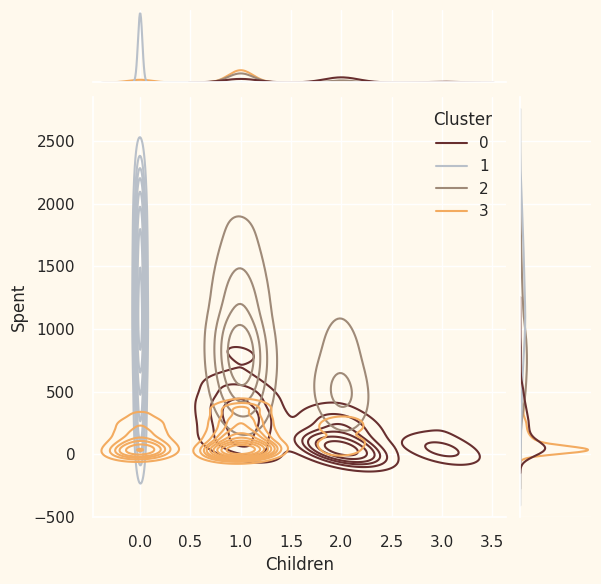

<Figure size 800x550 with 0 Axes>

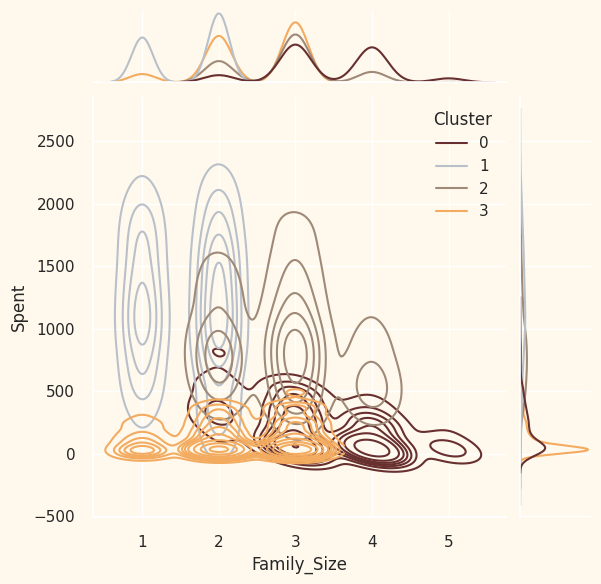

<Figure size 800x550 with 0 Axes>

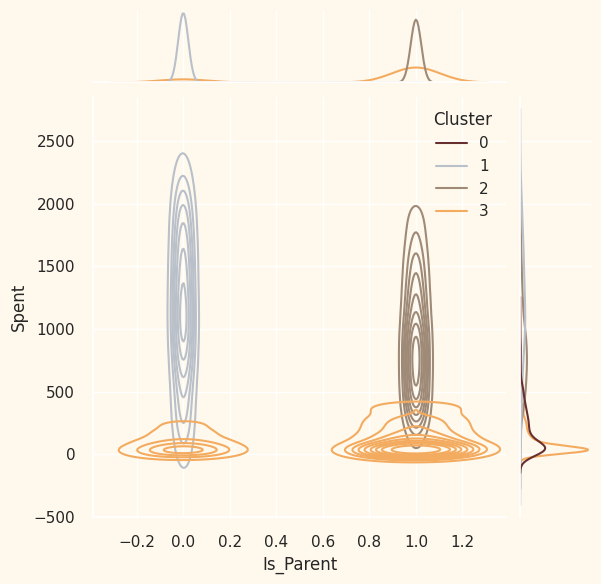

<Figure size 800x550 with 0 Axes>

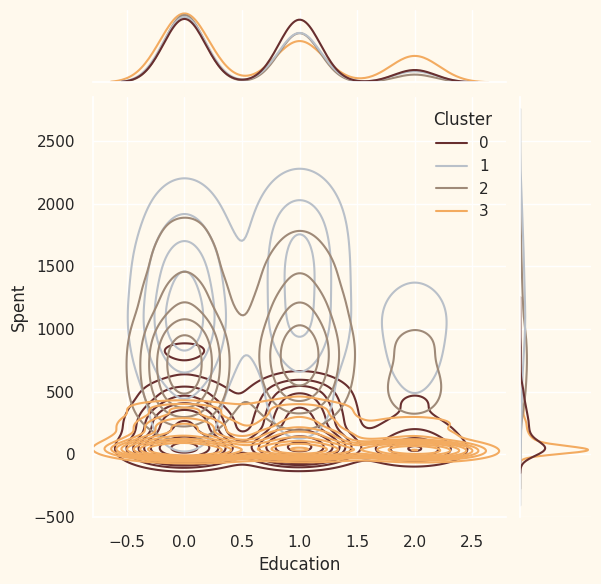

<Figure size 800x550 with 0 Axes>

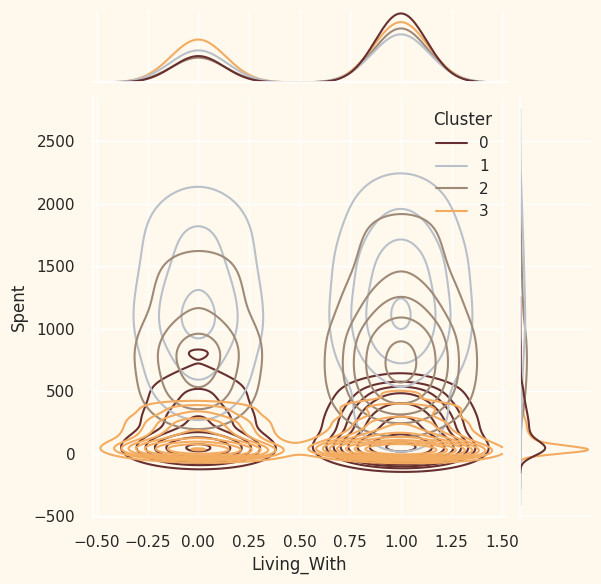

In [31]:
Personal = [ "Kidhome","Teenhome","Customer_Dur", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i],y=df['Spent'],hue=df['Cluster'],kind='kde',palette=pal)
    plt.show()

### ***Certainly, here are the notable points to consider regarding the customers in different clusters:***

🔍📚🤝

<div style="border: 12px solid green; padding: 4px;">
    <span style="font-size: 30px; color: red;">$$Wrapping It Up With A Conclusion📊$$</span>
</div>


### *****In this exciting project, I harnessed the power of clustering to classify our customers into four distinct groups. I carefully considered their family structures, income levels, and spending behaviors. This newfound insight holds the key to crafting exceptionally effective marketing strategies!***** 📊🎯🧑‍🤝‍🧑💼

<div style="border: 2px solid green; padding: 10px;">
    <span style="color: green; font-size: 30px;">If you enjoyed this Notebook, please do upvote.👍</span>
    <br>
    <span style="color: blue; font-size: 30px;">If you have any questions, feel free to comment! 💬</span>
    <br>
    <span style="color: purple; font-size: 30px;">Best Wishes! 🌟</span>
</div>

